<a href="https://colab.research.google.com/github/taniagiovani/vixprojects-hci/blob/main/Classification_Model_HCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CLASSIFICATION MODEL**

# Input Data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import io
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Home Credit Dataset/edited/application_train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Collab Dataset/Home Credit Dataset/edited/application_test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  bool   
 5   FLAG_OWN_REALTY      307511 non-null  bool   
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_TYPE_SUITE      306219 non-null  object 
 12  NAME_INCOME_TYPE     307511 non-null  object 
 13  NAME_EDUCATION_TYPE  307511 non-null  object 
 14  NAME_FAMILY_STATUS   307511 non-null  object 
 15  NAME_HOUSING_TYPE

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SK_ID_CURR           48744 non-null  int64  
 1   NAME_CONTRACT_TYPE   48744 non-null  object 
 2   CODE_GENDER          48744 non-null  object 
 3   FLAG_OWN_CAR         48744 non-null  bool   
 4   FLAG_OWN_REALTY      48744 non-null  bool   
 5   CNT_CHILDREN         48744 non-null  int64  
 6   AMT_INCOME_TOTAL     48744 non-null  float64
 7   AMT_CREDIT           48744 non-null  float64
 8   AMT_ANNUITY          48720 non-null  float64
 9   AMT_GOODS_PRICE      48744 non-null  float64
 10  NAME_TYPE_SUITE      47833 non-null  object 
 11  NAME_INCOME_TYPE     48744 non-null  object 
 12  NAME_EDUCATION_TYPE  48744 non-null  object 
 13  NAME_FAMILY_STATUS   48744 non-null  object 
 14  NAME_HOUSING_TYPE    48744 non-null  object 
 15  CNT_FAM_MEMBERS      48744 non-null 

In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,False,True,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,False,False,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,2.0,School
2,100004,0,Revolving loans,M,True,True,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Government
3,100006,0,Cash loans,F,False,True,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,False,True,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1.0,Religion


In [7]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100001,Cash loans,F,False,True,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,2,Kindergarten
1,100005,Cash loans,M,False,True,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,2,Self-employed
2,100013,Cash loans,M,True,True,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,2,Transport: type 3
3,100028,Cash loans,F,False,True,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,4,Business Entity Type 3
4,100038,Cash loans,M,True,False,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,3,Business Entity Type 3


In [8]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.0,238500.0,450000.0,679500.0,4050000.0
CNT_FAM_MEMBERS,307509.0,2.152665,0.910682,1.0,2.0,2.0,3.0,20.0


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,48744.0,277796.676350,103169.547296,100001.0,188557.75,277549.0,367555.5,456250.0
CNT_CHILDREN,48744.0,0.397054,0.709047,0.0,0.00,0.0,1.0,20.0
AMT_INCOME_TOTAL,48744.0,178431.805855,101522.591536,26941.5,112500.00,157500.0,225000.0,4410000.0
AMT_CREDIT,48744.0,516740.435561,365397.004174,45000.0,260640.00,450000.0,675000.0,2245500.0
AMT_ANNUITY,48720.0,29426.240209,16016.368315,2295.0,17973.00,26199.0,37390.5,180576.0
AMT_GOODS_PRICE,48744.0,462618.840473,336710.215040,45000.0,225000.00,396000.0,630000.0,2245500.0
CNT_FAM_MEMBERS,48744.0,2.146767,0.890423,1.0,2.00,2.0,3.0,21.0


In [10]:
df_train.shape, df_test.shape

((307511, 18), (48744, 17))

In [11]:
df_train = df_train.drop(['SK_ID_CURR'], axis = 1)
df_test = df_test.drop(['SK_ID_CURR'], axis = 1)

In [12]:
num_col = df_train.select_dtypes(include = [np.number]).columns.tolist()
cat_col = df_train.select_dtypes(exclude = [np.number]).columns.tolist()

In [13]:
num_col

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS']

In [14]:
cat_col

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

# Missing Values

In [15]:
df_test.isna().sum()

NAME_CONTRACT_TYPE       0
CODE_GENDER              0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
CNT_CHILDREN             0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             24
AMT_GOODS_PRICE          0
NAME_TYPE_SUITE        911
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
CNT_FAM_MEMBERS          0
ORGANIZATION_TYPE        0
dtype: int64

In [16]:
df_train.isna().sum()

TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
CNT_FAM_MEMBERS           2
ORGANIZATION_TYPE         0
dtype: int64

In [17]:
#MISSING VALUE (DATA TRAIN)

df_train['AMT_ANNUITY'].fillna(df_train['AMT_ANNUITY'].median(), inplace = True)
df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].median(), inplace = True)
df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0], inplace = True)
df_train['CNT_FAM_MEMBERS'].fillna(df_train['CNT_FAM_MEMBERS'].median(), inplace = True)

In [18]:
#MISSING VALUE (DATA TEST)

df_test['AMT_ANNUITY'].fillna(df_test['AMT_ANNUITY'].median(), inplace = True)
df_test['NAME_TYPE_SUITE'].fillna(df_test['NAME_TYPE_SUITE'].mode()[0], inplace = True)

In [19]:
df_train.isna().sum()

TARGET                 0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

In [20]:
df_test.isna().sum()

NAME_CONTRACT_TYPE     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
CNT_FAM_MEMBERS        0
ORGANIZATION_TYPE      0
dtype: int64

# Outliers

In [21]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS']:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries
    
df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 307511
Jumlah baris setelah memfilter outlier: 275173


# Visualisasi Data

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
# set visualization settings

%matplotlib inline
plt.rcParams['figure.figsize'] = (15,25)
plt.rcParams['font.size'] = 6
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')

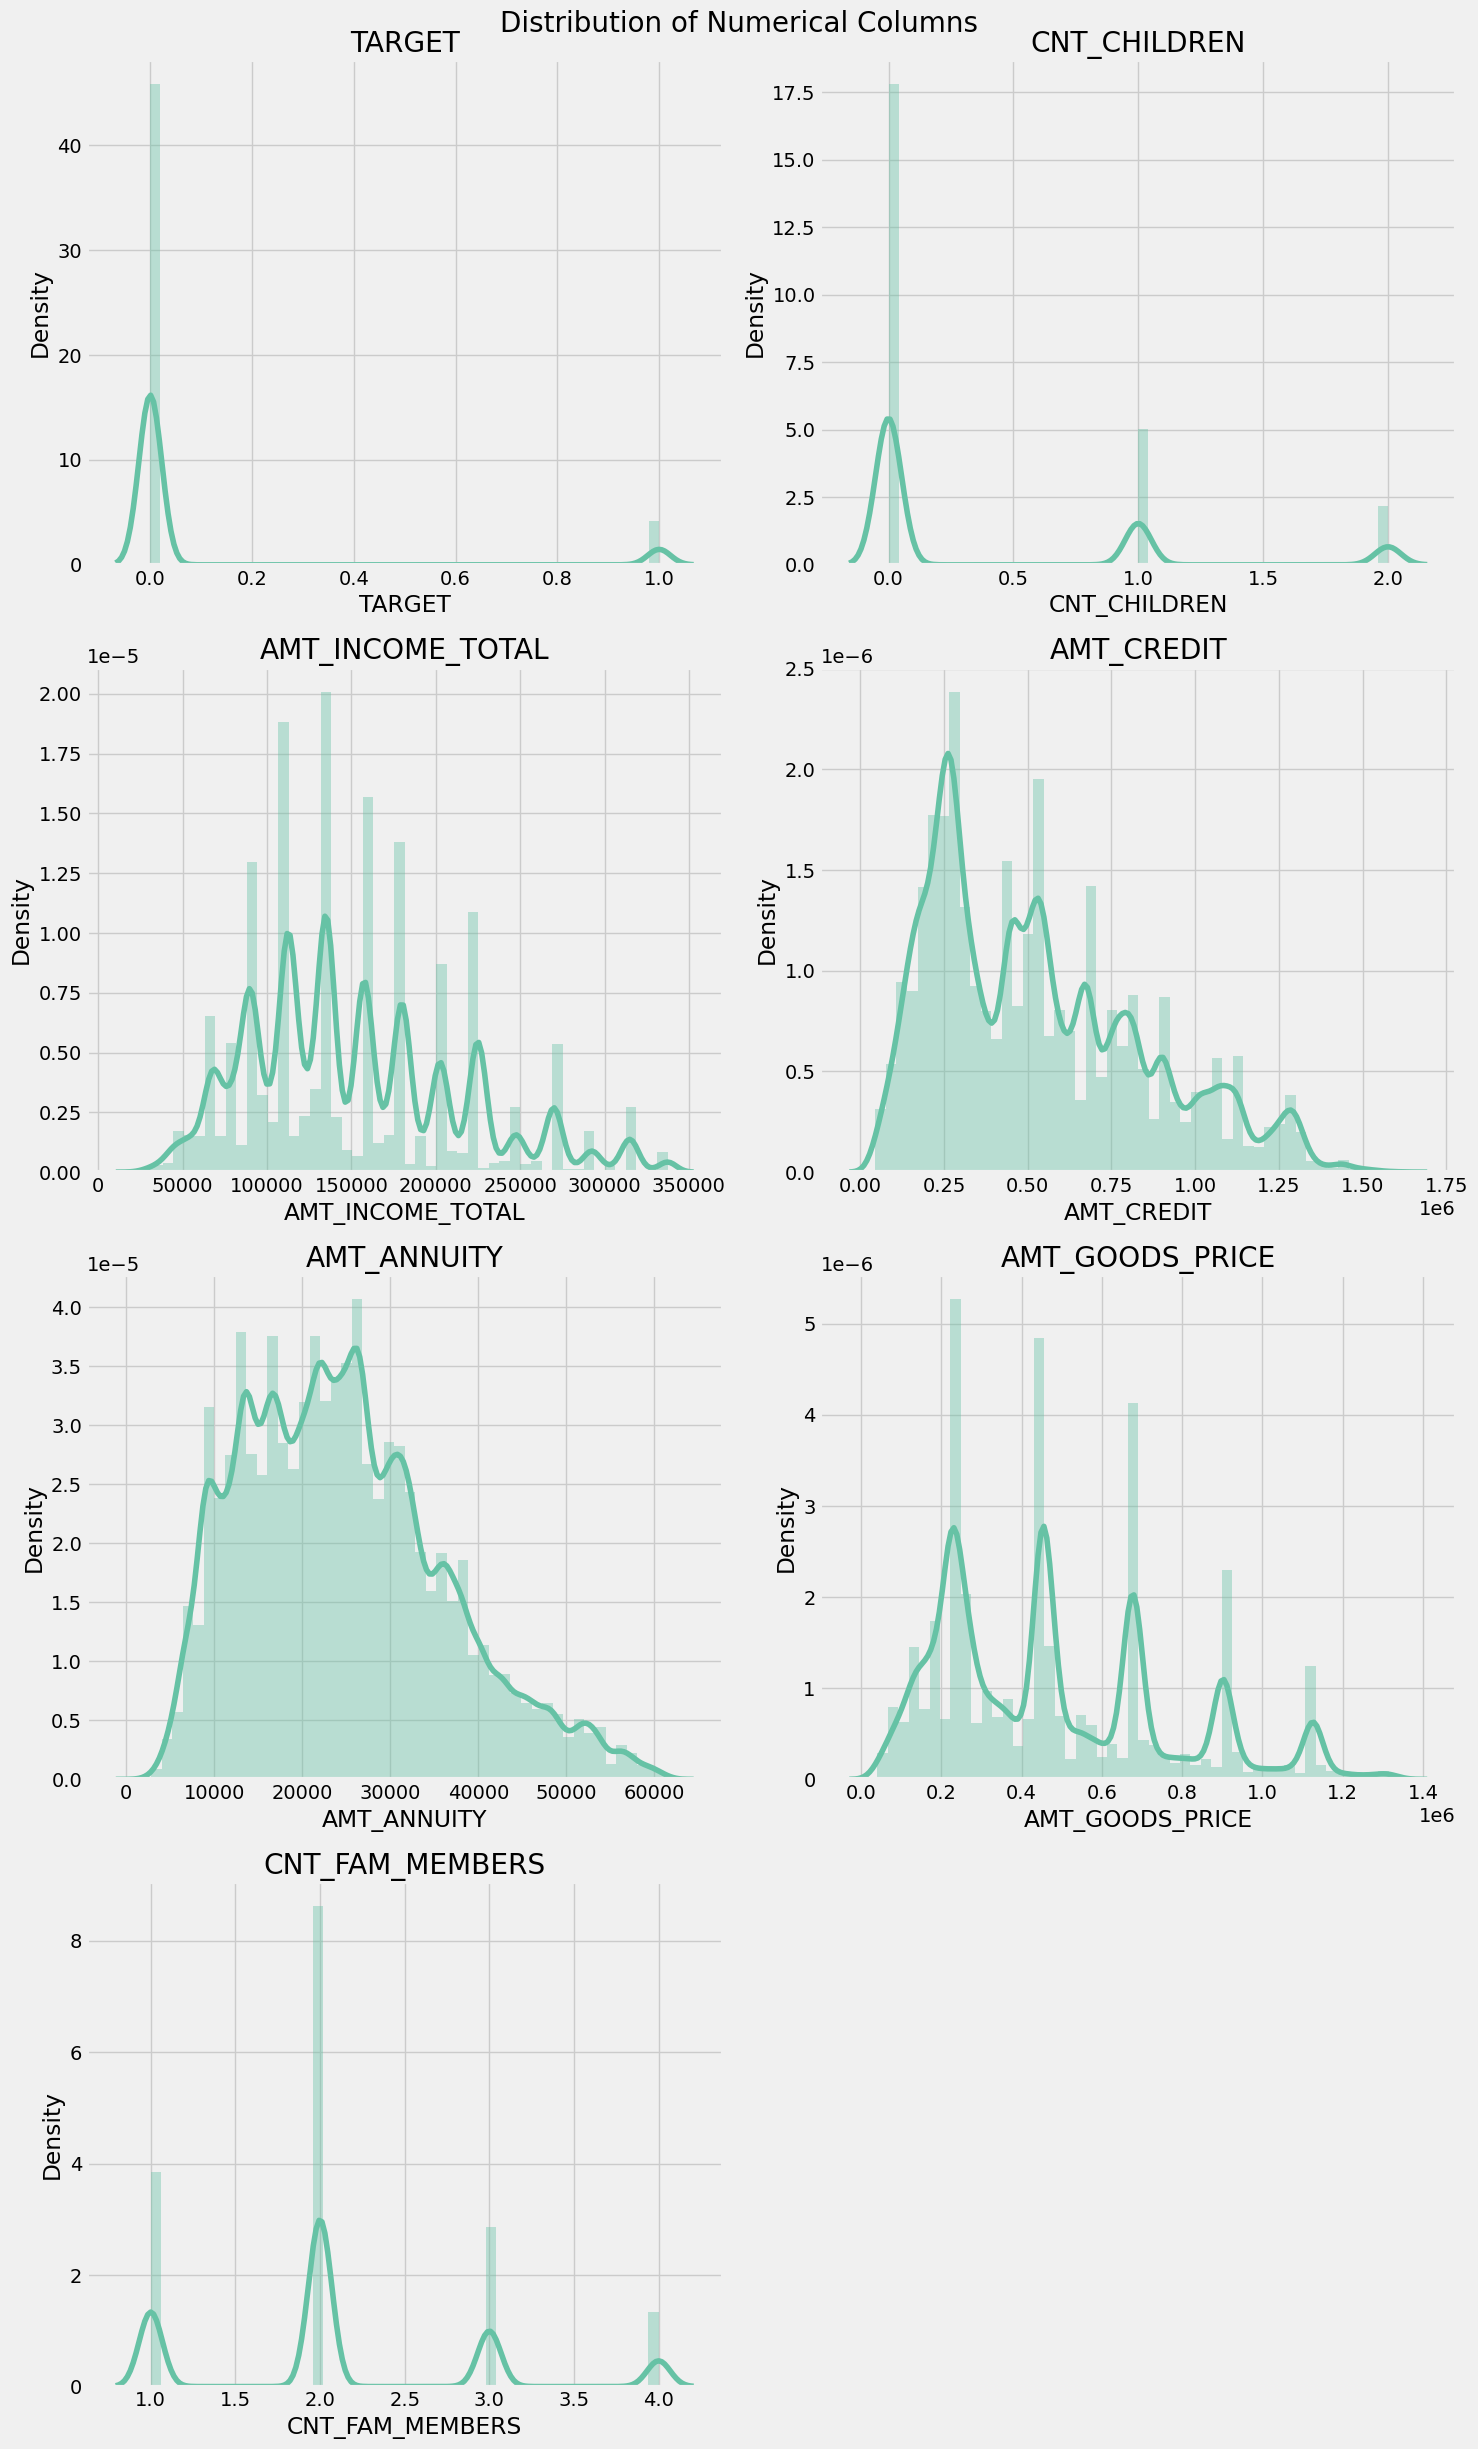

In [24]:
# visualize numerical data

for index, col in enumerate(num_col):
  plt.subplot(4,2, index+1)
  sns.distplot(df_train[col])
  plt.title(col)
  plt.tight_layout()
  plt.suptitle('Distribution of Numerical Columns', fontsize = 20)

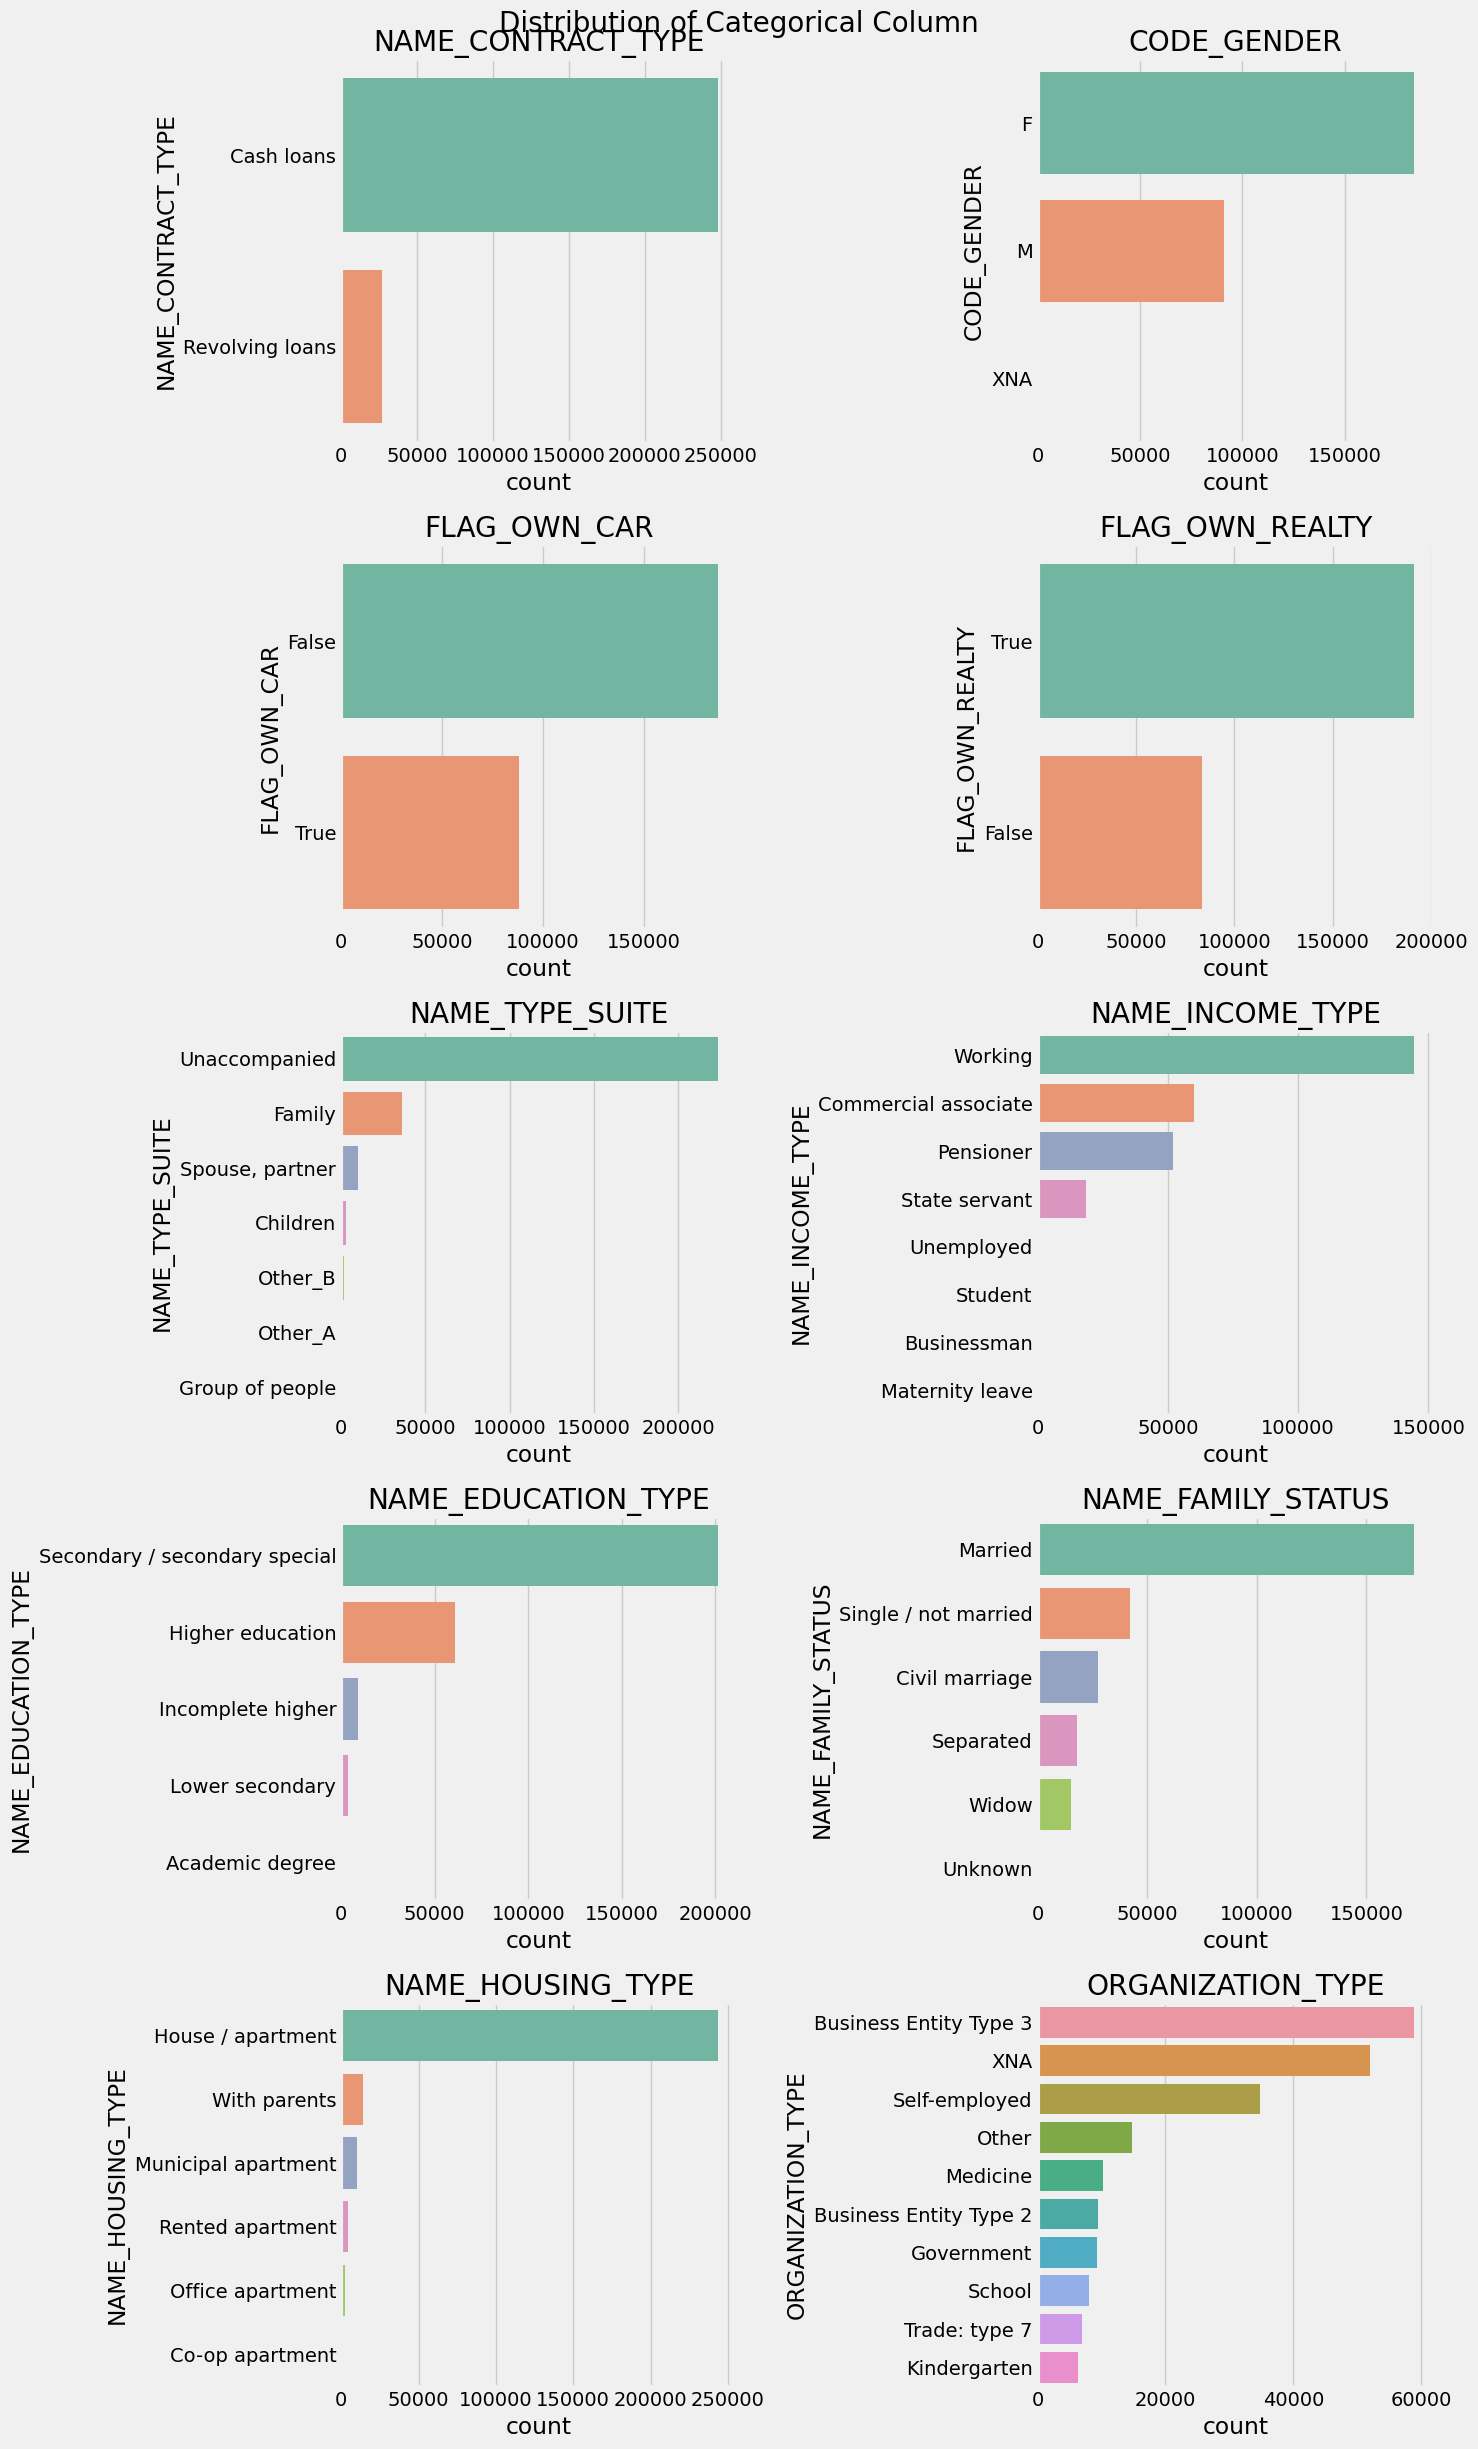

In [25]:
# for non numerical data, make countplot
# a.iloc[:, 2:5] => call all rows from columns with index 2 (3rd column) to index 4 (5th column)
for index, col in enumerate(cat_col):
  if len(df_train[col]) > 0:
    top = 10
  else:
    top = None
  plt.subplot(5,2, index+1)
  sns.countplot(y = df_train[col], order = df_train[col].value_counts().iloc[:top].index)
  plt.title(col)
  plt.tight_layout()
  plt.suptitle('Distribution of Categorical Column', fontsize = 20)

<Axes: xlabel='count', ylabel='TARGET'>

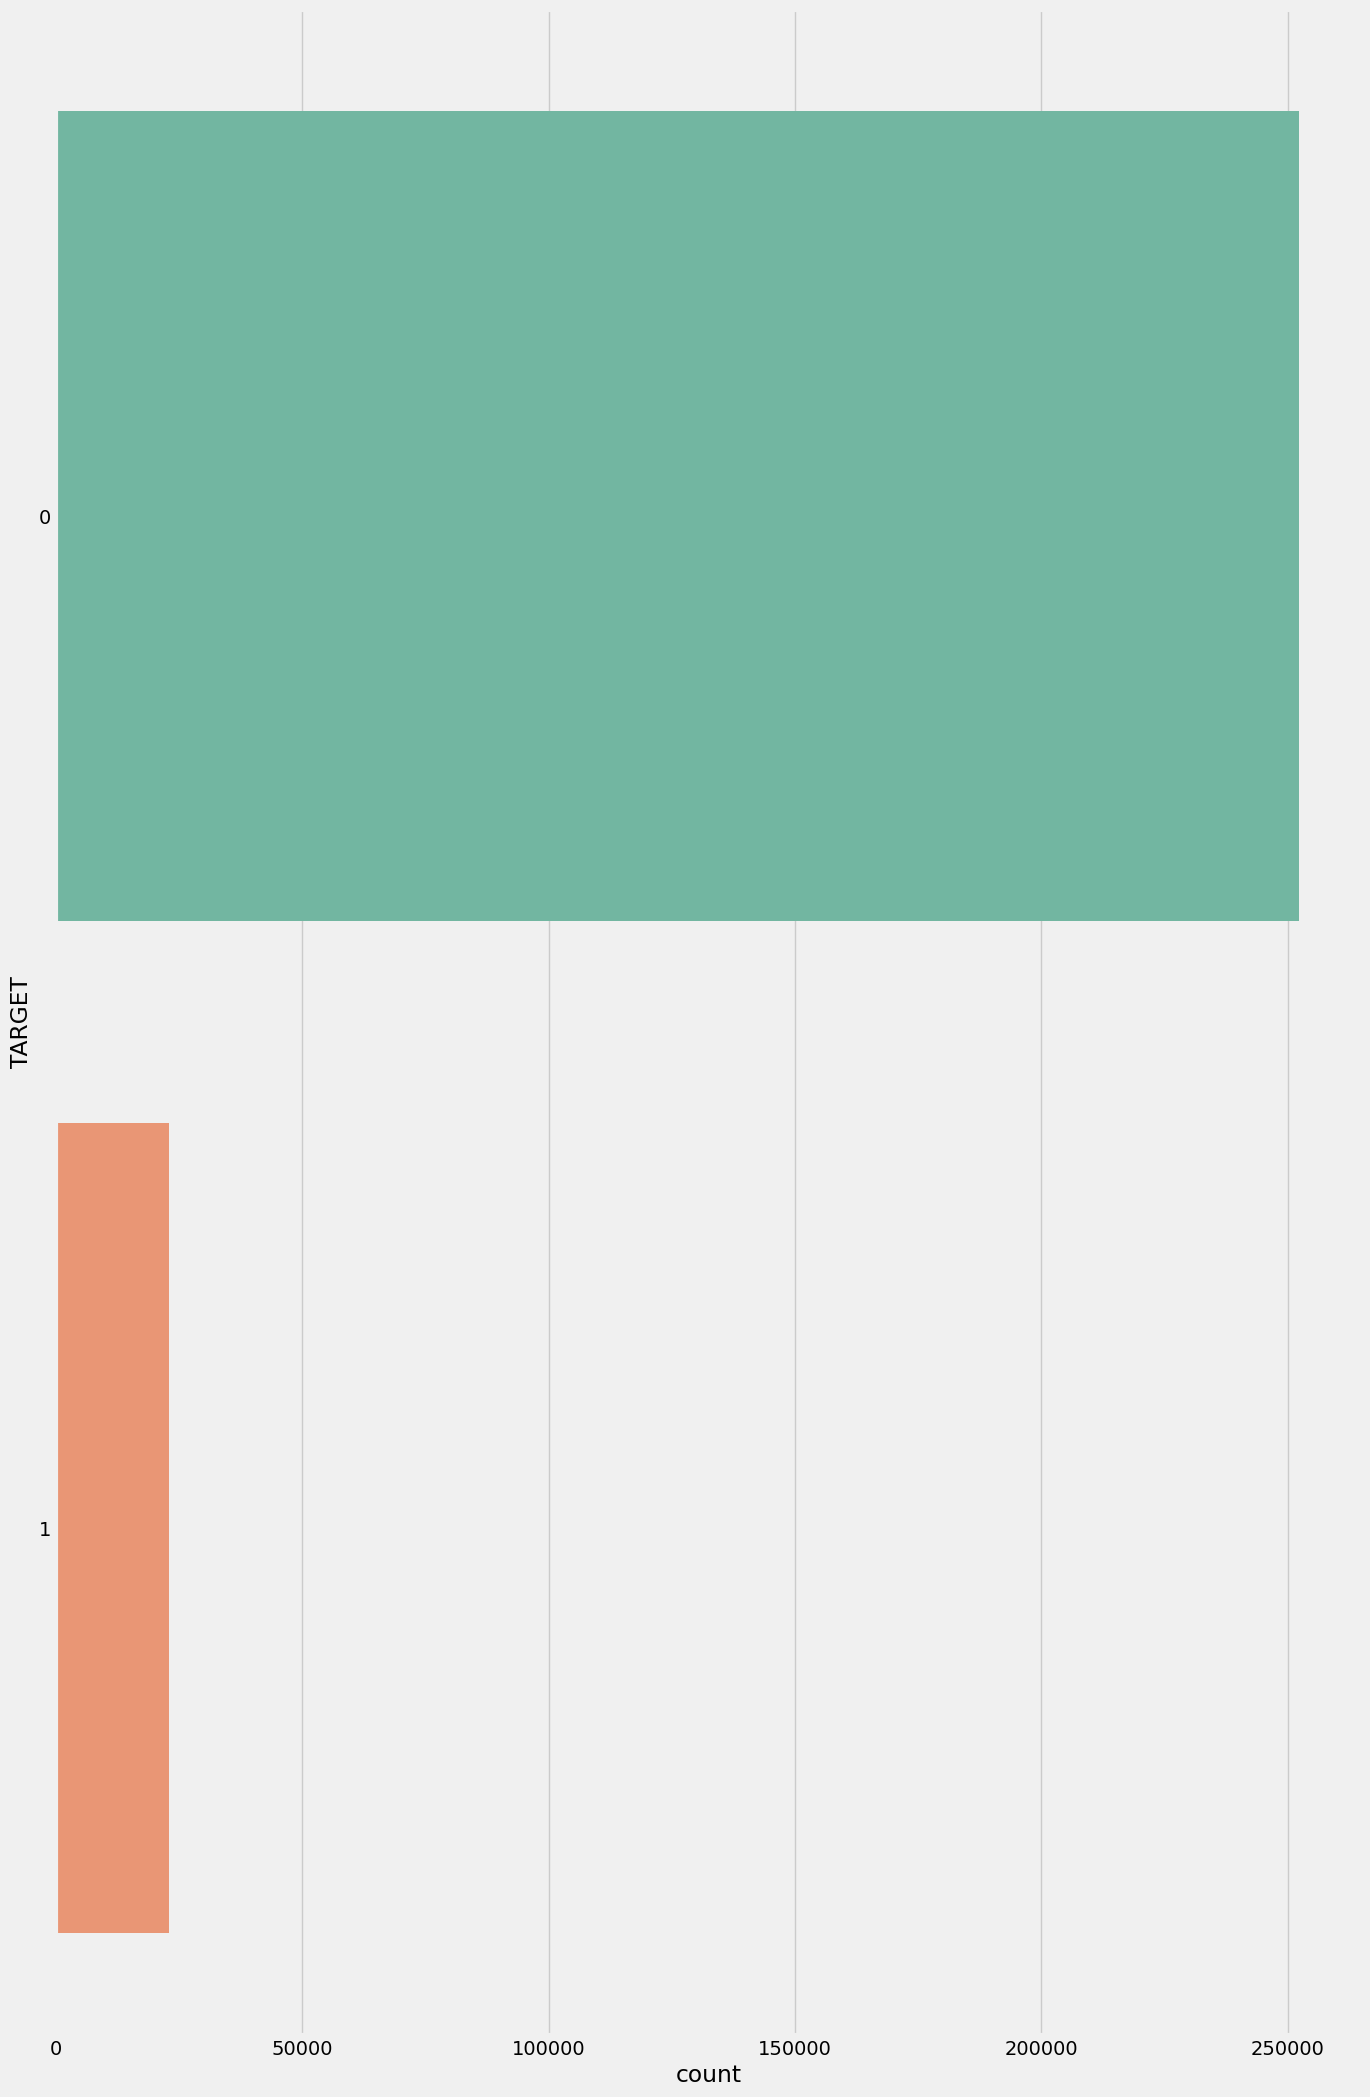

In [26]:
sns.countplot(y = df_train['TARGET'], order = df_train['TARGET'].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='CNT_CHILDREN'>

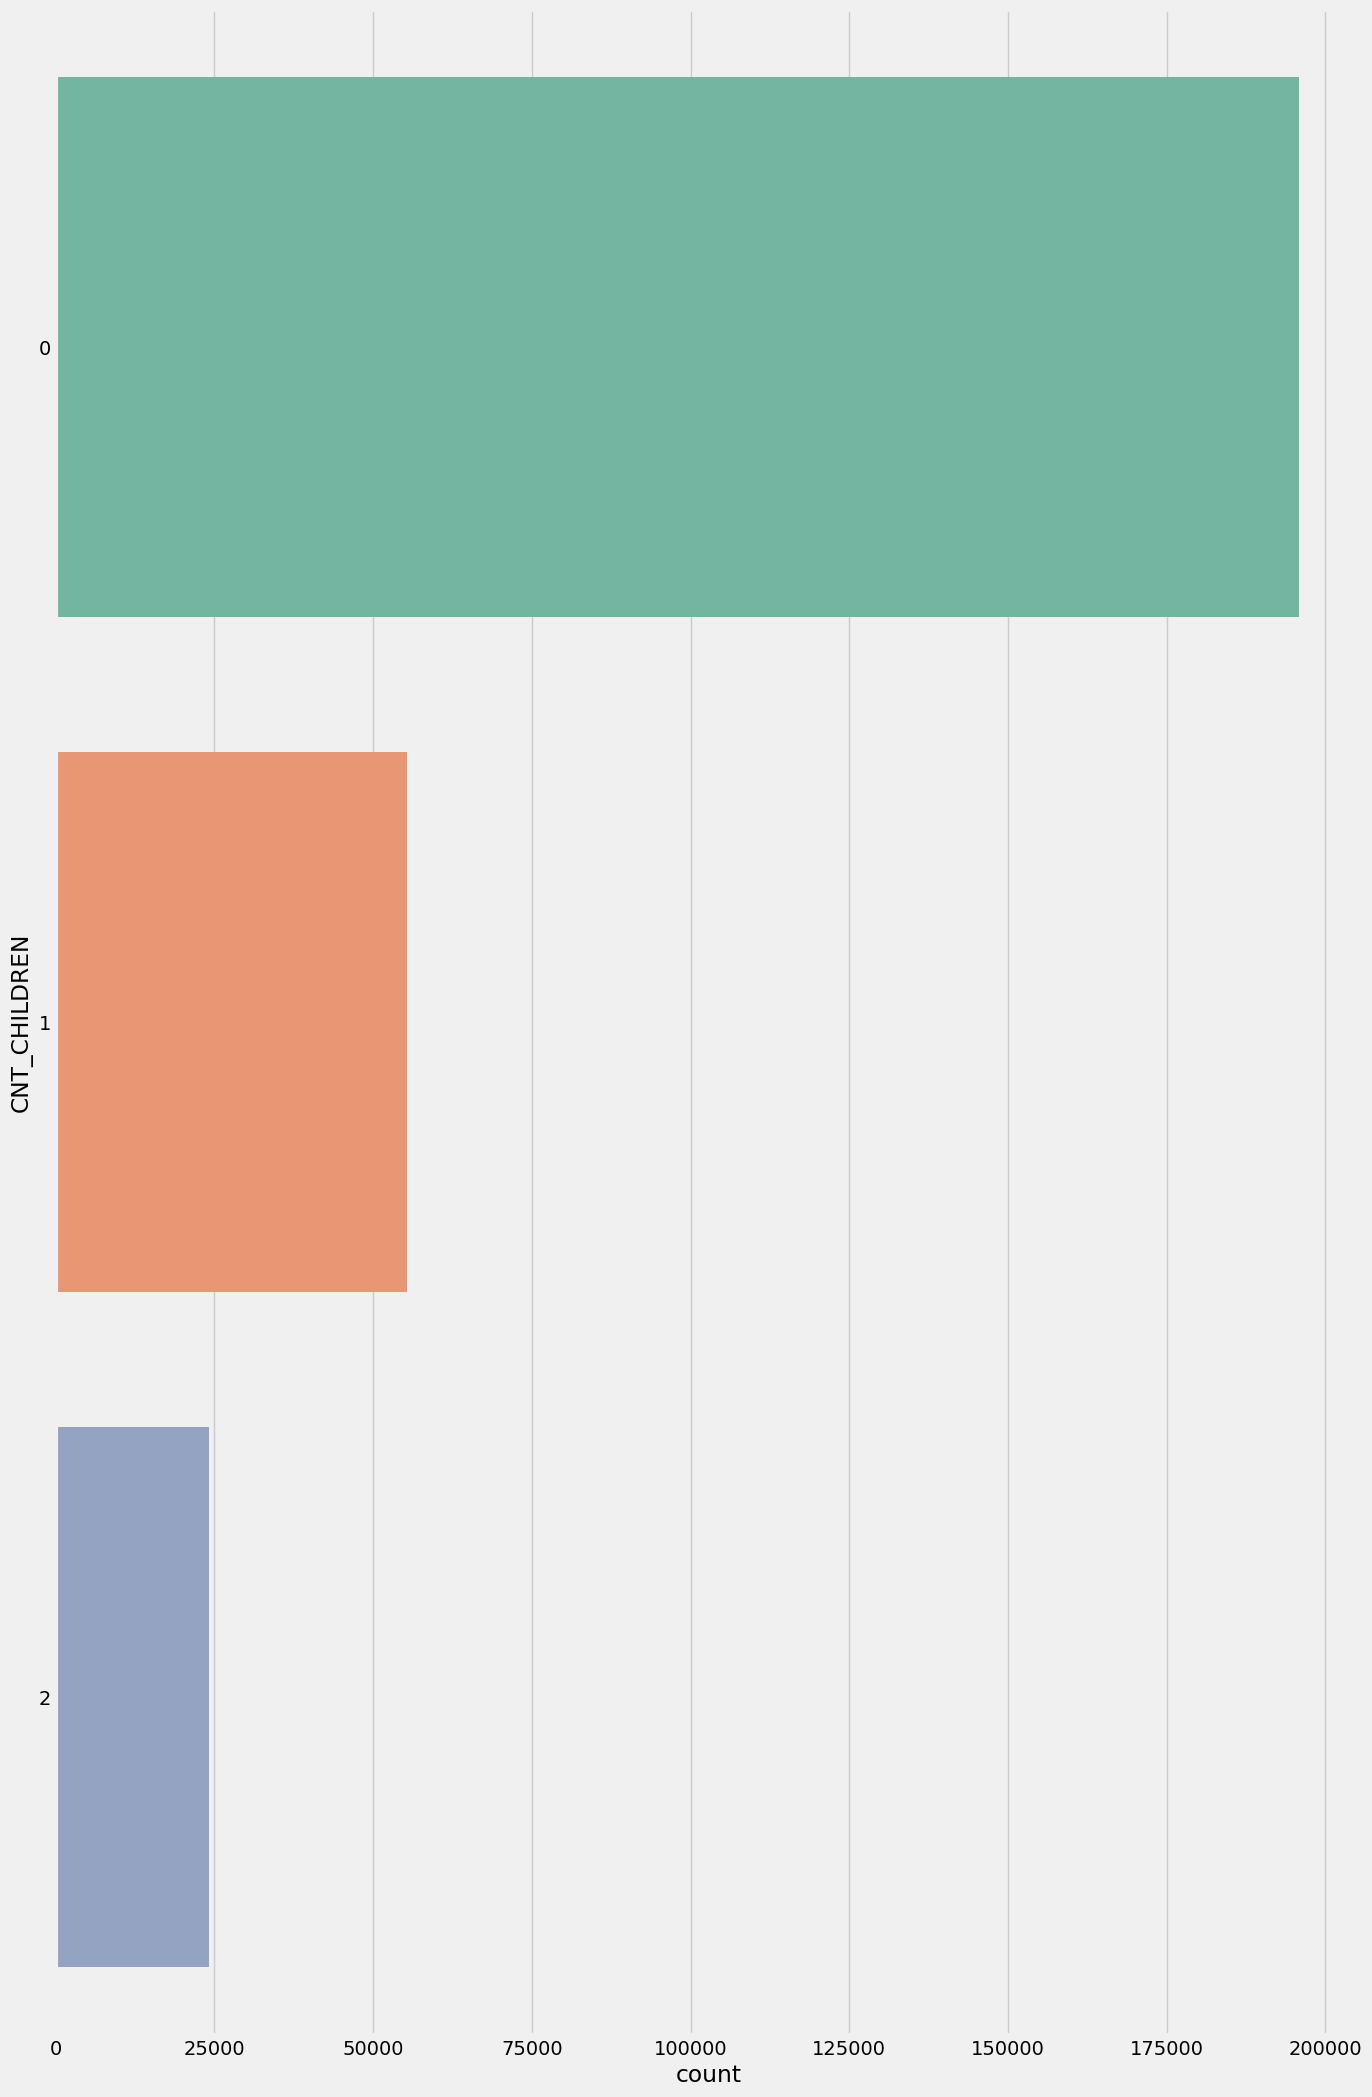

In [27]:
sns.countplot(y = df_train['CNT_CHILDREN'], order = df_train['CNT_CHILDREN'].value_counts().iloc[:10].index)

<Axes: xlabel='count', ylabel='CNT_FAM_MEMBERS'>

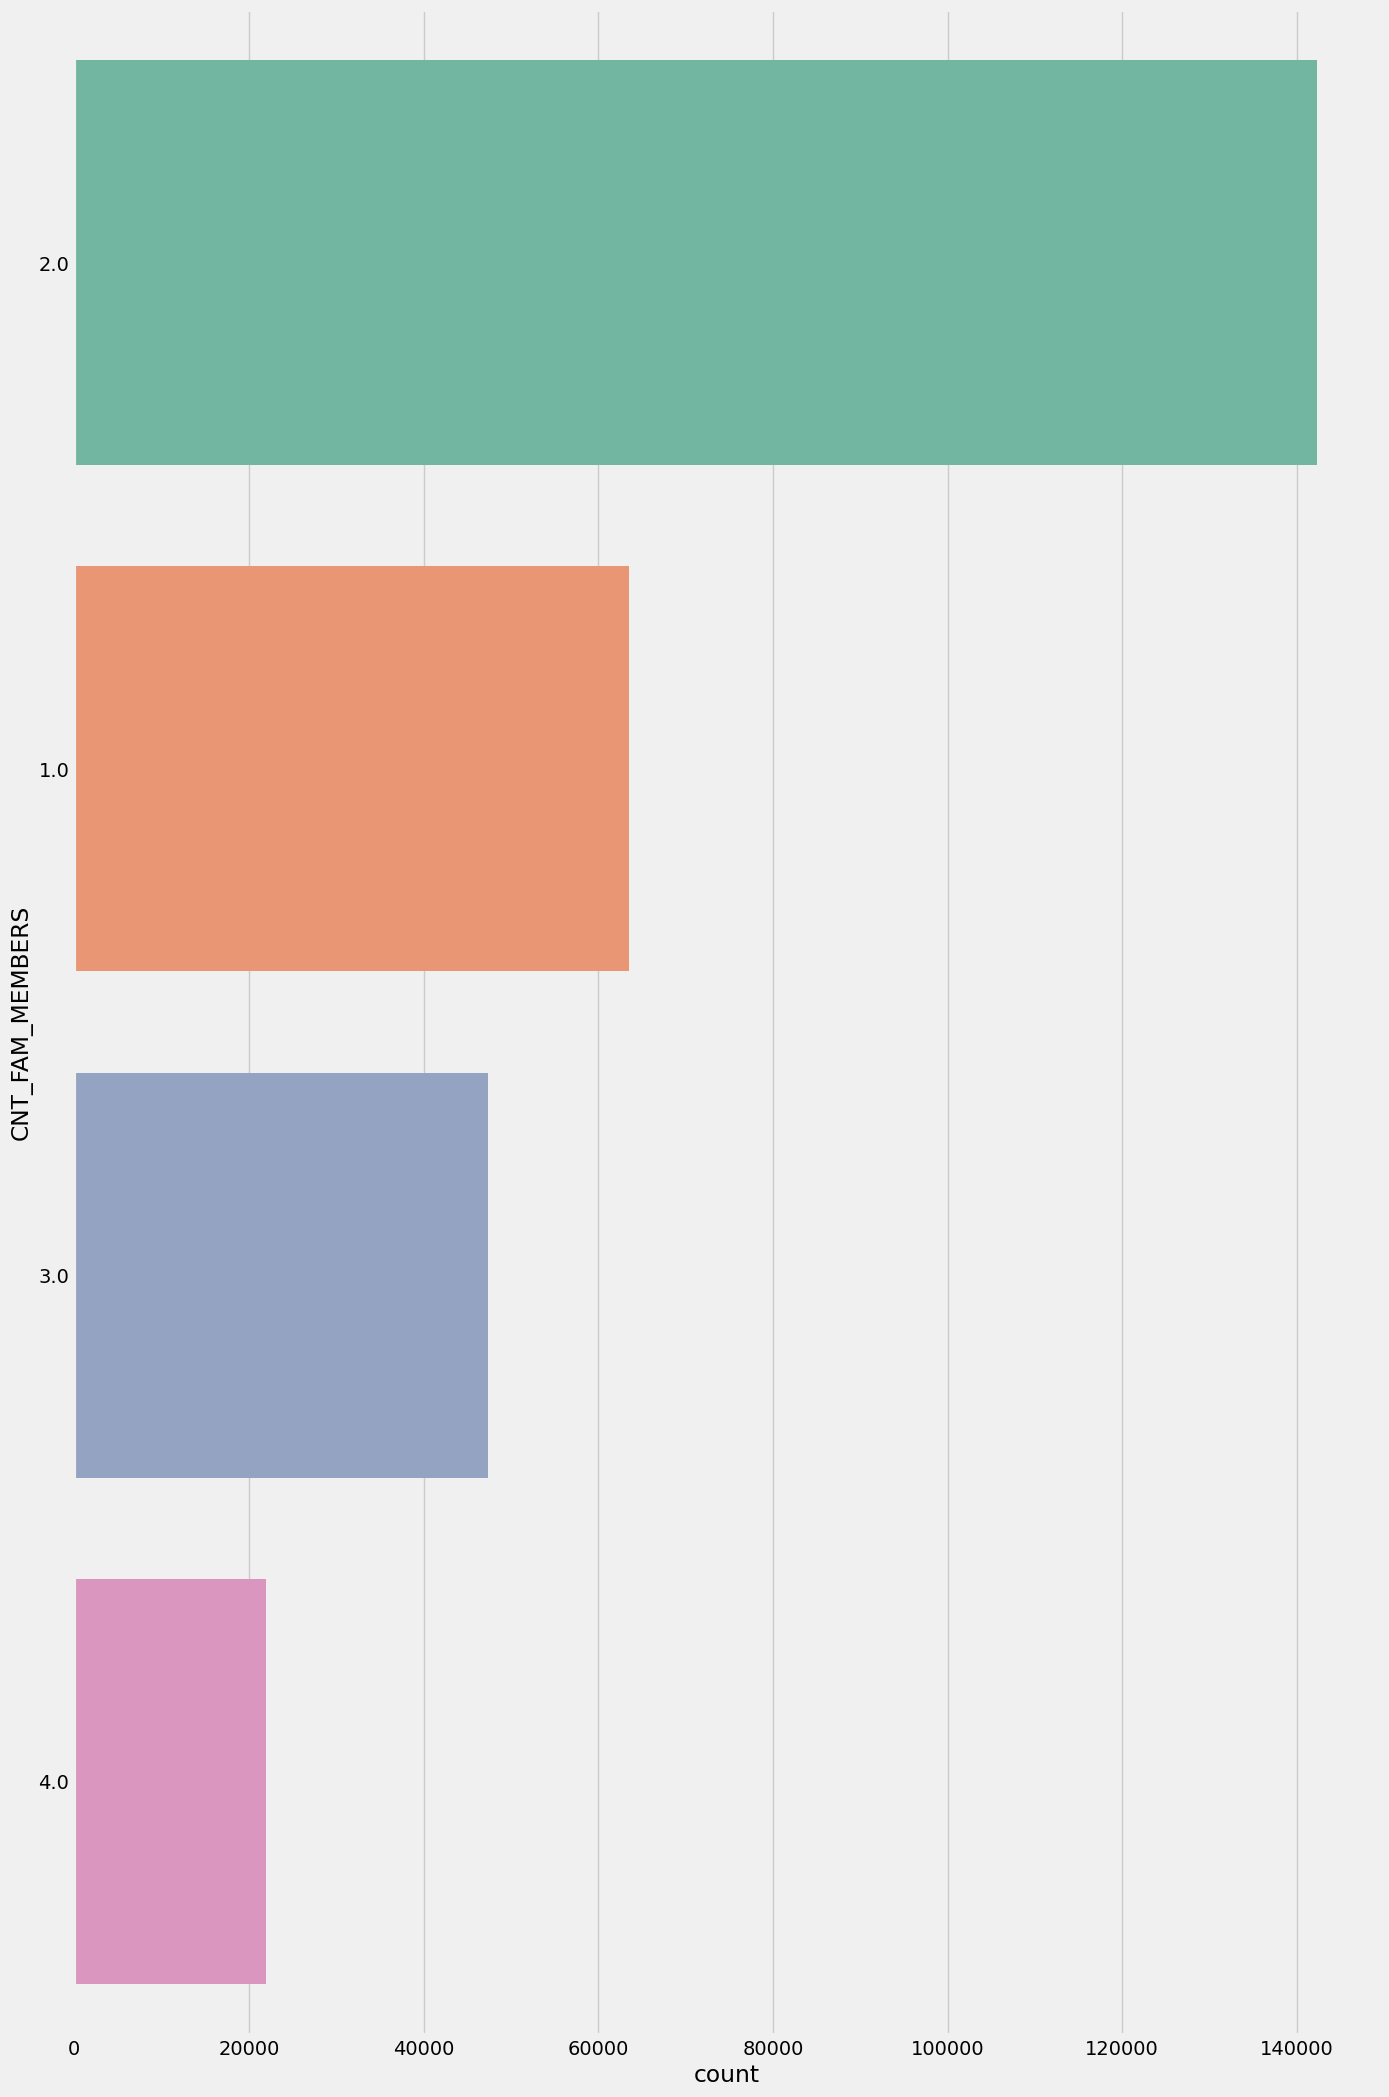

In [28]:
sns.countplot(y = df_train['CNT_FAM_MEMBERS'], order = df_train['CNT_FAM_MEMBERS'].value_counts().iloc[:10].index)

# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [30]:
df_train['CNT_FAM_MEMBERS'] = df_train['CNT_FAM_MEMBERS'].astype(int)

In [31]:
lab = LabelEncoder()
df_train['NAME_CONTRACT_TYPE'] = lab.fit_transform(df_train['NAME_CONTRACT_TYPE'])
df_train['CODE_GENDER'] = lab.fit_transform(df_train['CODE_GENDER'])
df_train['FLAG_OWN_CAR'] = lab.fit_transform(df_train['FLAG_OWN_CAR'])
df_train['FLAG_OWN_REALTY'] = lab.fit_transform(df_train['FLAG_OWN_REALTY'])
df_train['NAME_TYPE_SUITE'] = lab.fit_transform(df_train['NAME_TYPE_SUITE'])
df_train['NAME_INCOME_TYPE'] = lab.fit_transform(df_train['NAME_INCOME_TYPE'])
df_train['NAME_EDUCATION_TYPE'] = lab.fit_transform(df_train['NAME_EDUCATION_TYPE'])
df_train['NAME_FAMILY_STATUS'] = lab.fit_transform(df_train['NAME_FAMILY_STATUS'])
df_train['NAME_HOUSING_TYPE'] = lab.fit_transform(df_train['NAME_HOUSING_TYPE'])
df_train['ORGANIZATION_TYPE'] = lab.fit_transform(df_train['ORGANIZATION_TYPE'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275173 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               275173 non-null  int64  
 1   NAME_CONTRACT_TYPE   275173 non-null  int64  
 2   CODE_GENDER          275173 non-null  int64  
 3   FLAG_OWN_CAR         275173 non-null  int64  
 4   FLAG_OWN_REALTY      275173 non-null  int64  
 5   CNT_CHILDREN         275173 non-null  int64  
 6   AMT_INCOME_TOTAL     275173 non-null  float64
 7   AMT_CREDIT           275173 non-null  float64
 8   AMT_ANNUITY          275173 non-null  float64
 9   AMT_GOODS_PRICE      275173 non-null  float64
 10  NAME_TYPE_SUITE      275173 non-null  int64  
 11  NAME_INCOME_TYPE     275173 non-null  int64  
 12  NAME_EDUCATION_TYPE  275173 non-null  int64  
 13  NAME_FAMILY_STATUS   275173 non-null  int64  
 14  NAME_HOUSING_TYPE    275173 non-null  int64  
 15  CNT_FAM_MEMBERS  

In [32]:
lab = LabelEncoder()
df_test['NAME_CONTRACT_TYPE'] = lab.fit_transform(df_test['NAME_CONTRACT_TYPE'])
df_test['CODE_GENDER'] = lab.fit_transform(df_test['CODE_GENDER'])
df_test['FLAG_OWN_CAR'] = lab.fit_transform(df_test['FLAG_OWN_CAR'])
df_test['FLAG_OWN_REALTY'] = lab.fit_transform(df_test['FLAG_OWN_REALTY'])
df_test['NAME_TYPE_SUITE'] = lab.fit_transform(df_test['NAME_TYPE_SUITE'])
df_test['NAME_INCOME_TYPE'] = lab.fit_transform(df_test['NAME_INCOME_TYPE'])
df_test['NAME_EDUCATION_TYPE'] = lab.fit_transform(df_test['NAME_EDUCATION_TYPE'])
df_test['NAME_FAMILY_STATUS'] = lab.fit_transform(df_test['NAME_FAMILY_STATUS'])
df_test['NAME_HOUSING_TYPE'] = lab.fit_transform(df_test['NAME_HOUSING_TYPE'])
df_test['ORGANIZATION_TYPE'] = lab.fit_transform(df_test['ORGANIZATION_TYPE'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NAME_CONTRACT_TYPE   48744 non-null  int64  
 1   CODE_GENDER          48744 non-null  int64  
 2   FLAG_OWN_CAR         48744 non-null  int64  
 3   FLAG_OWN_REALTY      48744 non-null  int64  
 4   CNT_CHILDREN         48744 non-null  int64  
 5   AMT_INCOME_TOTAL     48744 non-null  float64
 6   AMT_CREDIT           48744 non-null  float64
 7   AMT_ANNUITY          48744 non-null  float64
 8   AMT_GOODS_PRICE      48744 non-null  float64
 9   NAME_TYPE_SUITE      48744 non-null  int64  
 10  NAME_INCOME_TYPE     48744 non-null  int64  
 11  NAME_EDUCATION_TYPE  48744 non-null  int64  
 12  NAME_FAMILY_STATUS   48744 non-null  int64  
 13  NAME_HOUSING_TYPE    48744 non-null  int64  
 14  CNT_FAM_MEMBERS      48744 non-null  int64  
 15  ORGANIZATION_TYPE    48744 non-null 

# Statistik Deskriptif

In [33]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,275173.0,0.083482,0.276610,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE,275173.0,0.098138,0.297502,0.0,0.0,0.0,0.0,1.0
CODE_GENDER,275173.0,0.330759,0.470518,0.0,0.0,0.0,1.0,2.0
FLAG_OWN_CAR,275173.0,0.320522,0.466678,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,275173.0,0.695740,0.460094,0.0,0.0,1.0,1.0,1.0
CNT_CHILDREN,275173.0,0.376109,0.640264,0.0,0.0,0.0,1.0,2.0
AMT_INCOME_TOTAL,275173.0,151044.420372,62425.161046,25650.0,112500.0,135000.0,180000.0,337500.0
AMT_CREDIT,275173.0,531741.643346,318443.573996,45000.0,269550.0,474048.0,755190.0,1615018.5
AMT_ANNUITY,275173.0,24700.211952,11396.409774,1615.5,15916.5,23692.5,31653.0,61659.0
AMT_GOODS_PRICE,275173.0,474169.998695,284561.009733,40500.0,225000.0,450000.0,675000.0,1341000.0


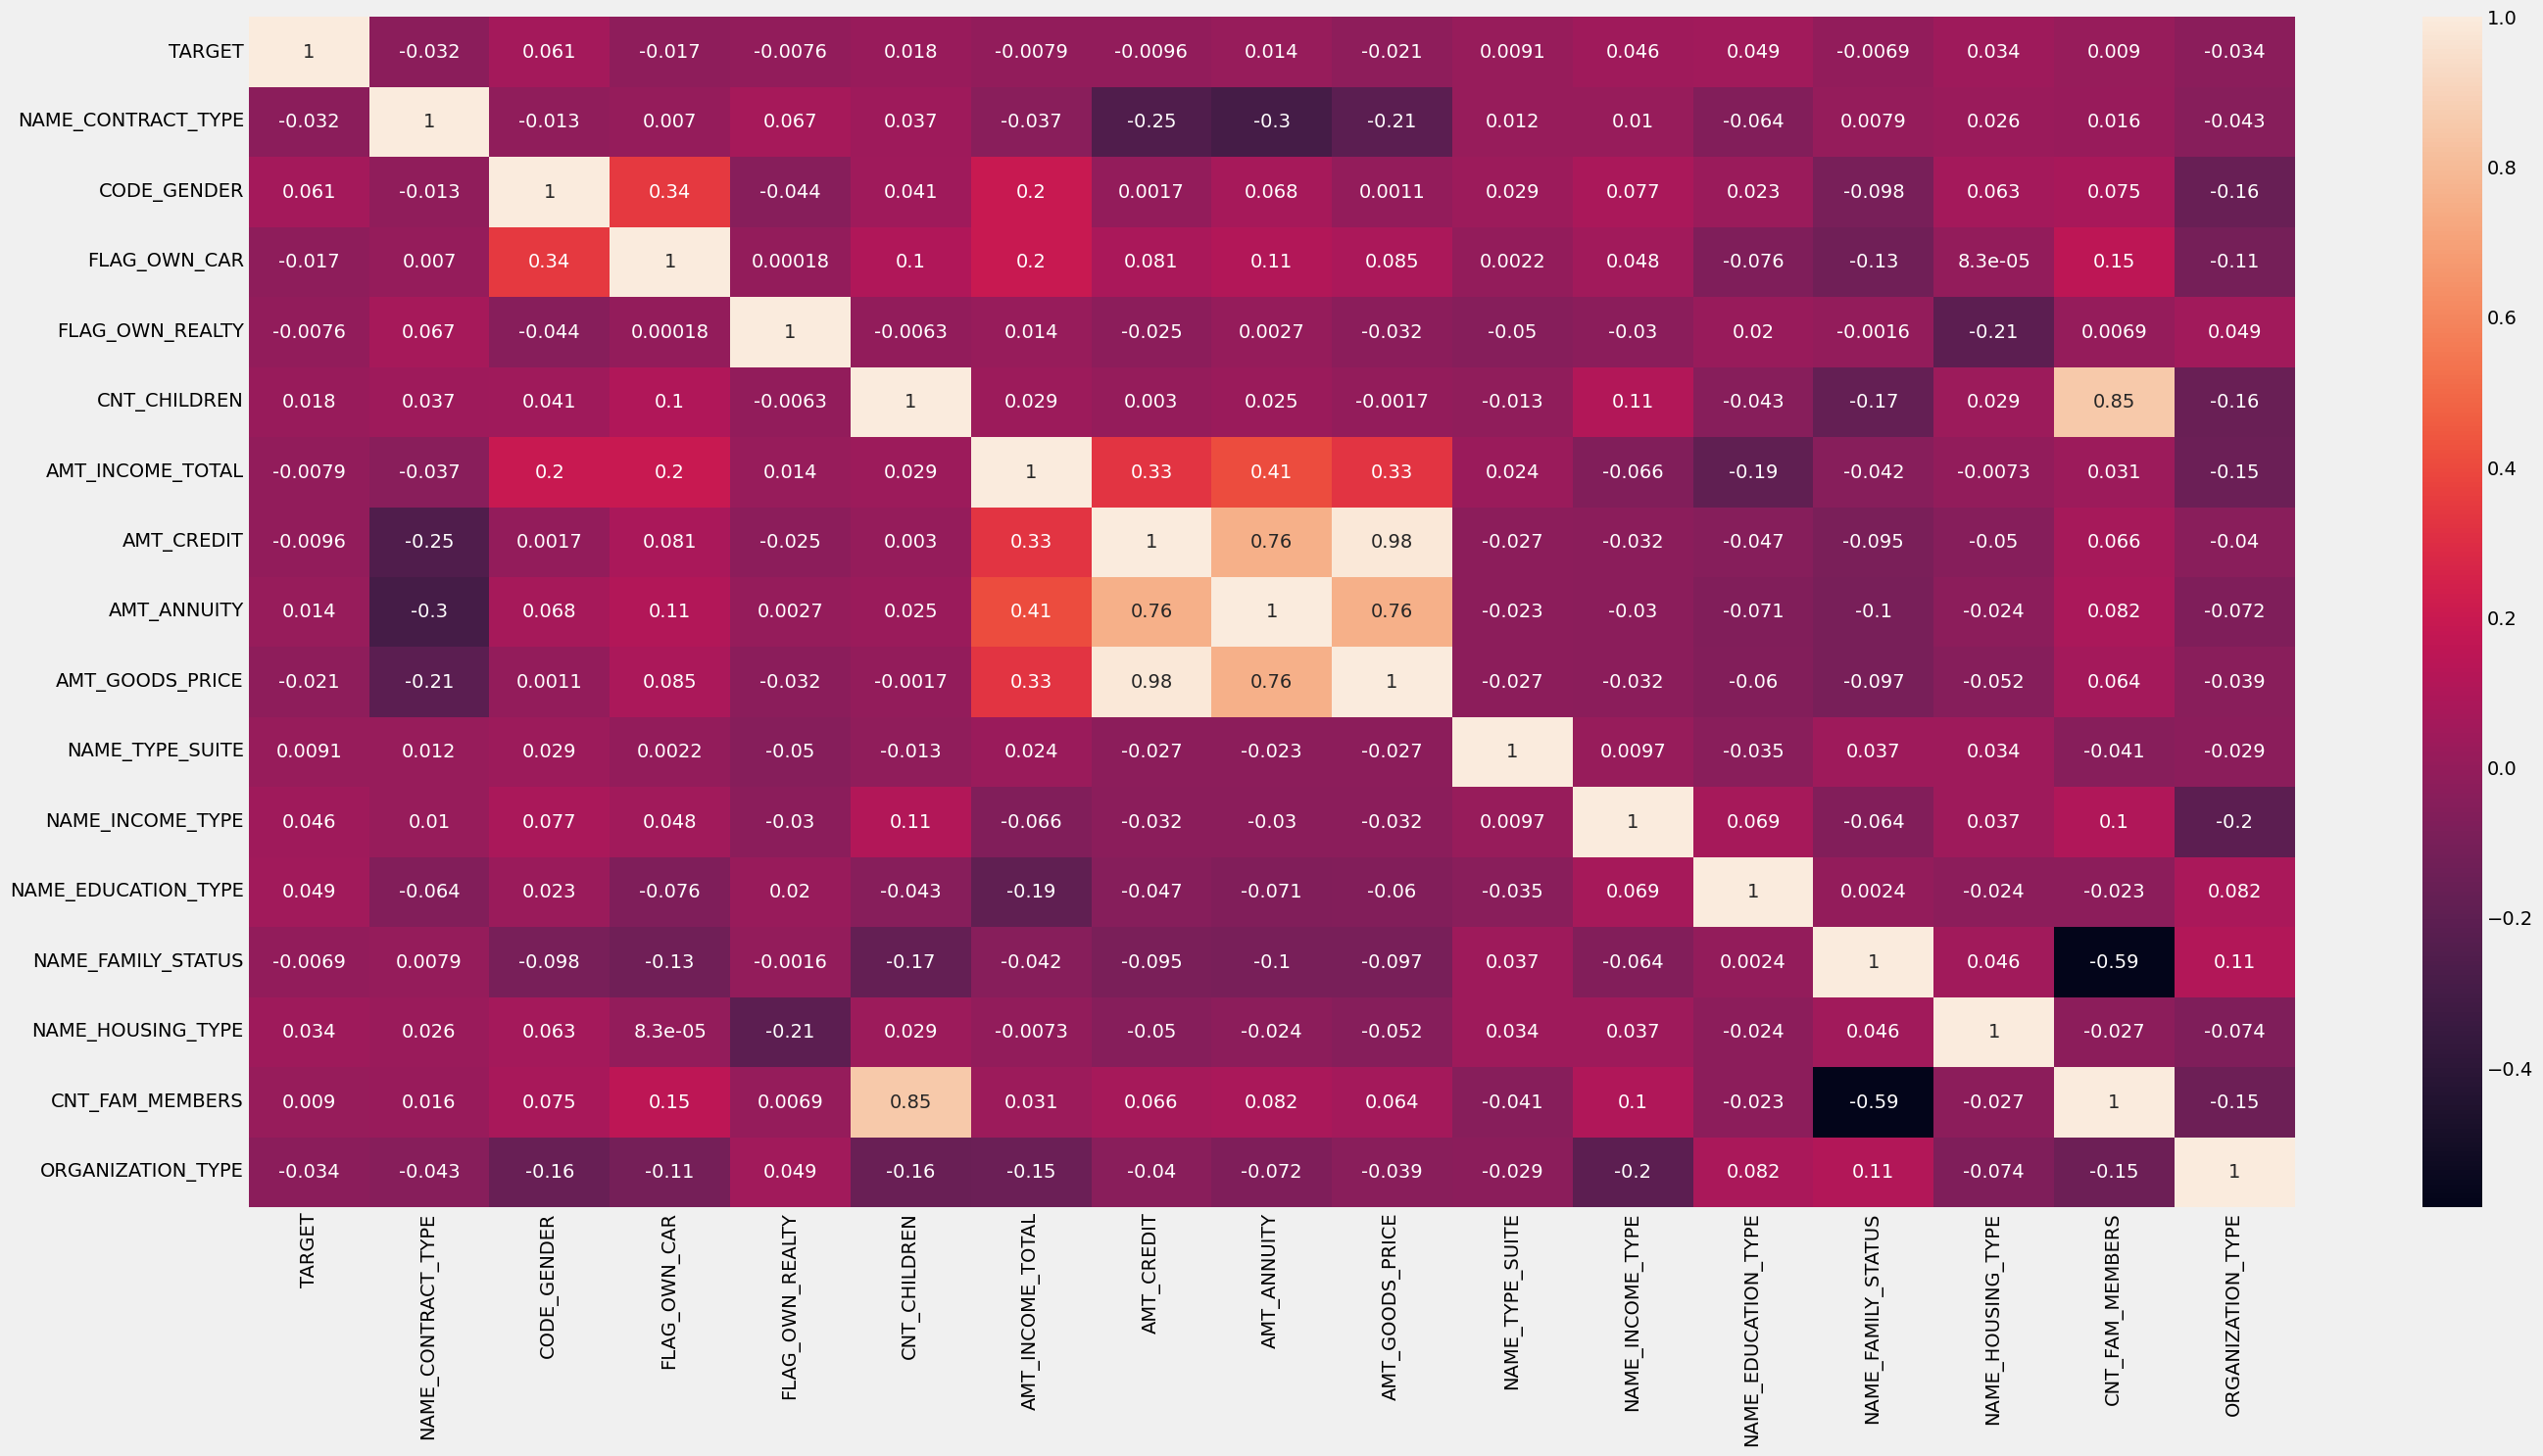

In [34]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [35]:
df_train = df_train.drop(['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'AMT_ANNUITY'], axis = 1)
df_test = df_test.drop(['AMT_GOODS_PRICE', 'CNT_CHILDREN', 'AMT_ANNUITY'], axis = 1)

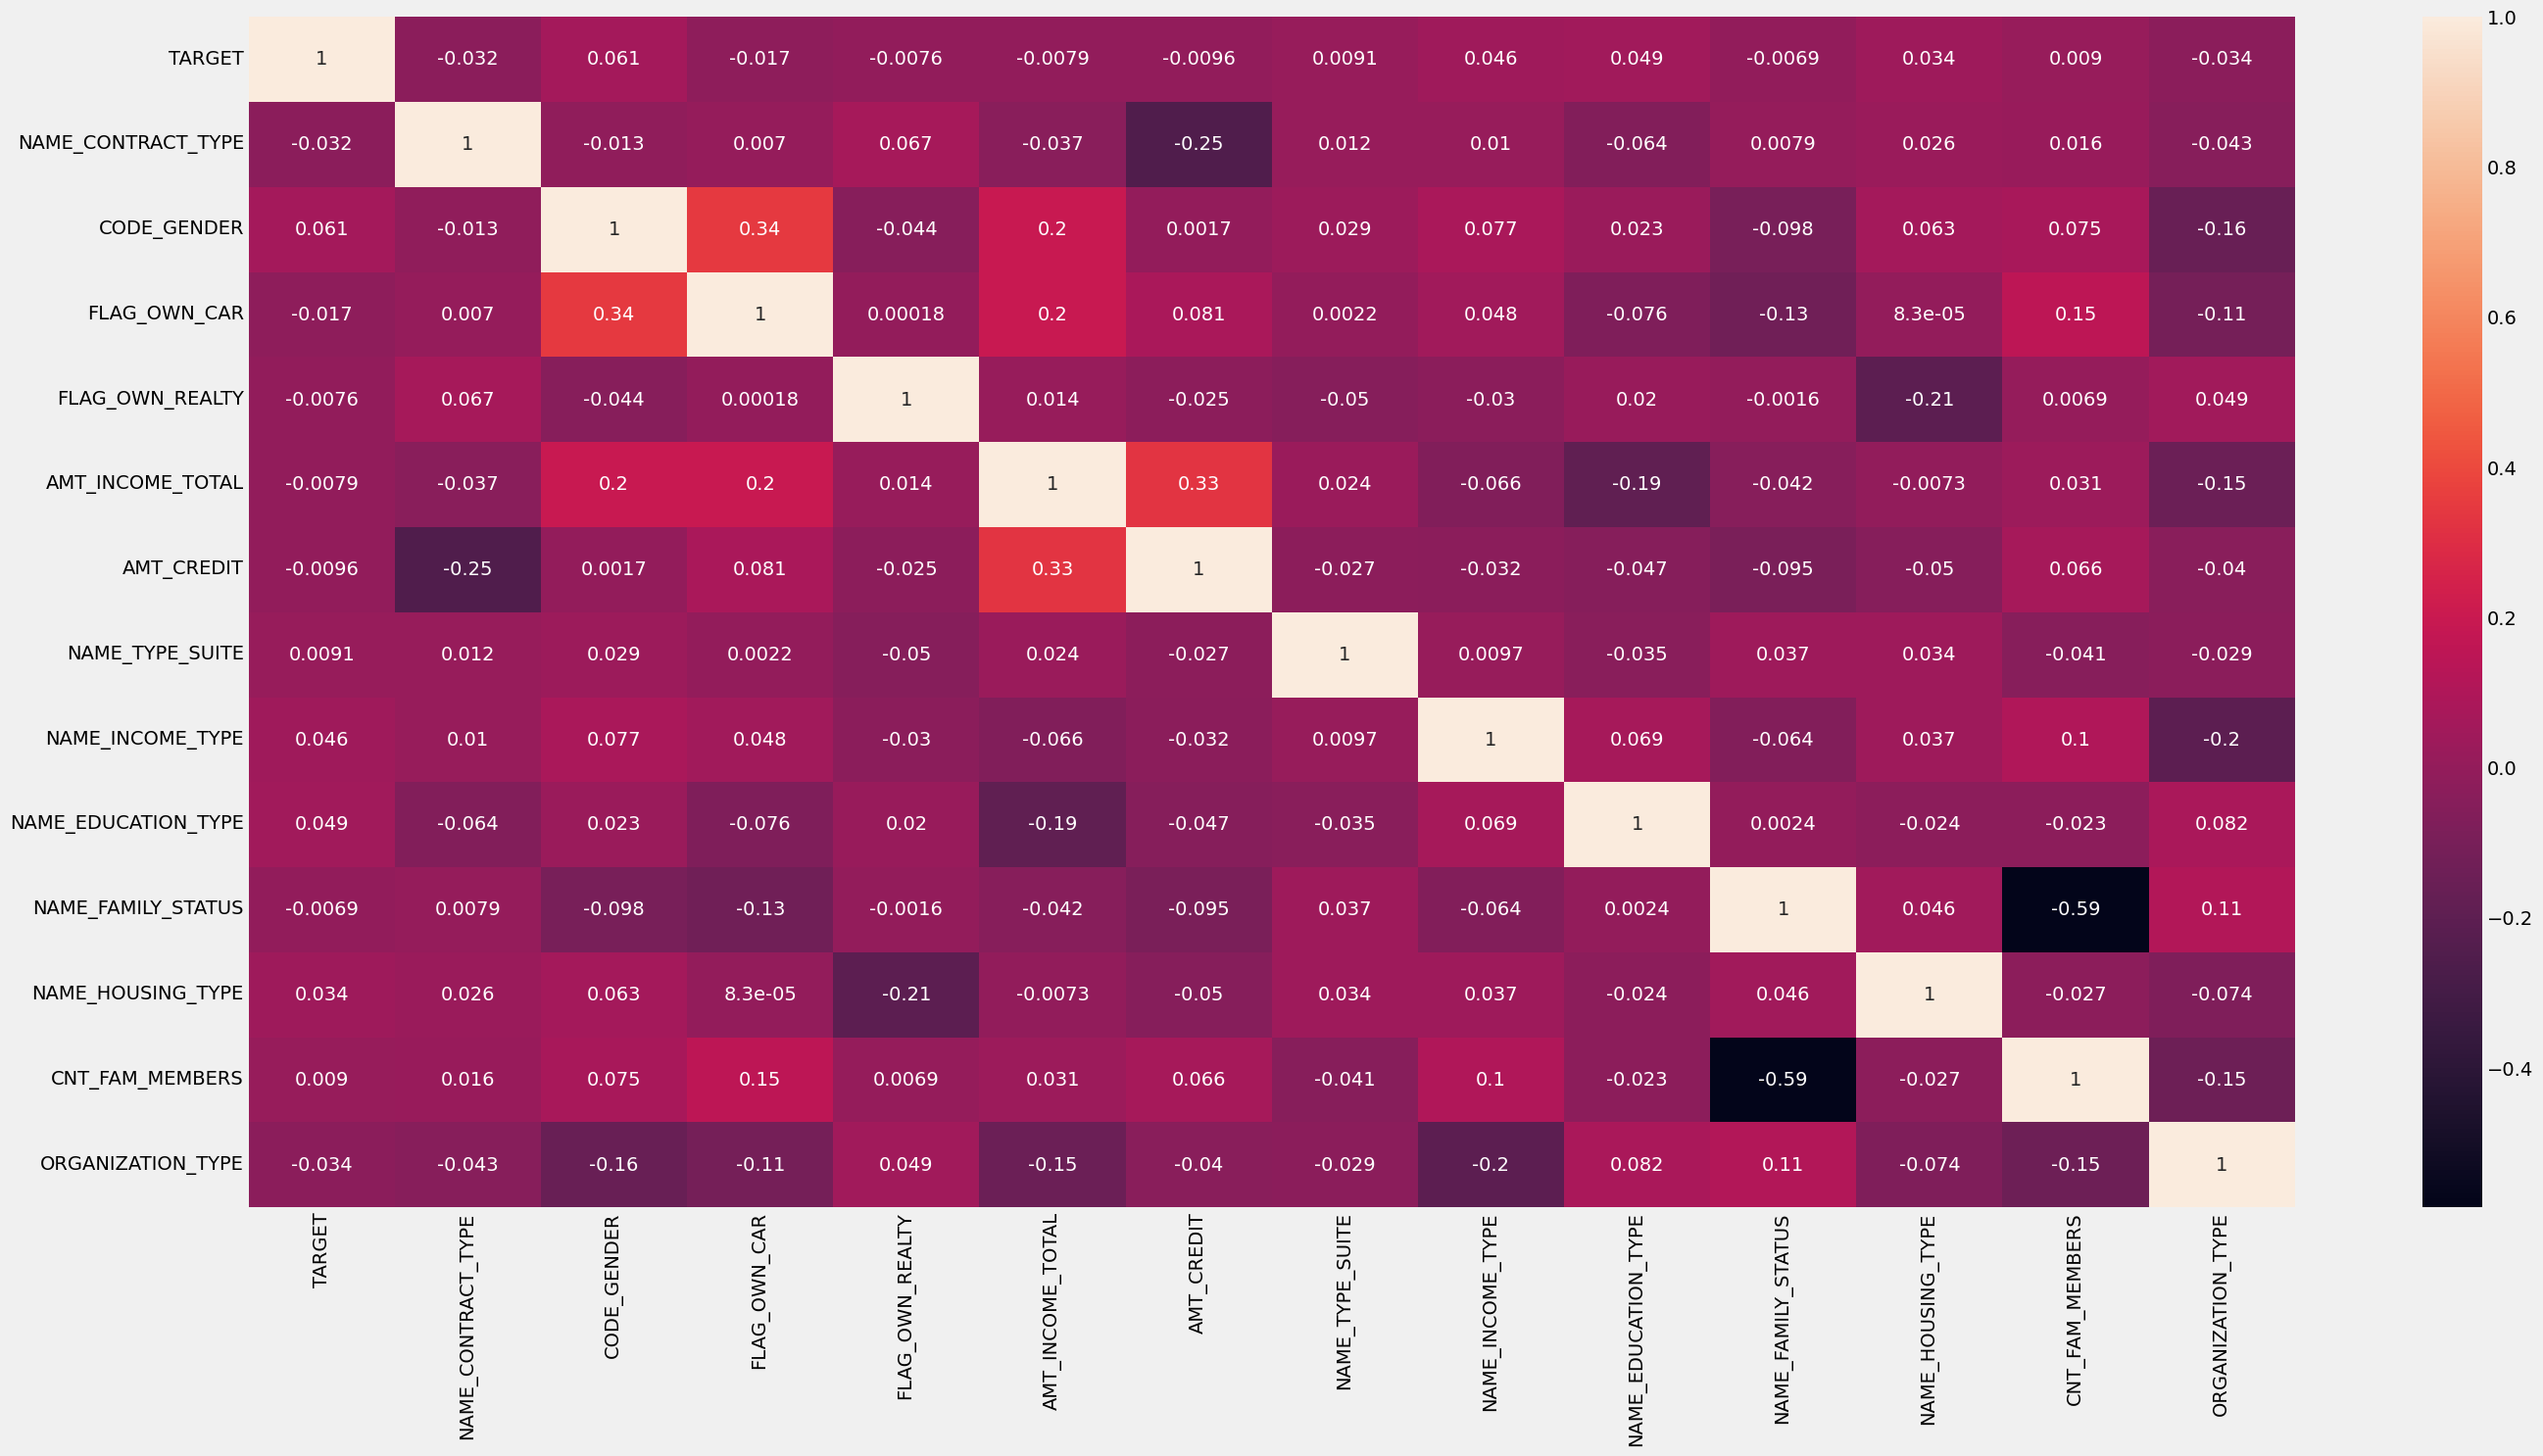

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(30,15))
#generate a correlation matrix for the whole dataset
corrMatrix = df_train.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

x_train = df_train.drop(['TARGET'], axis = 1)
y_train = df_train['TARGET']

scaler = MinMaxScaler()
X_train_transform = scaler.fit_transform(x_train)
X_train_transform = pd.DataFrame(X_train_transform,columns = x_train.columns)
X_train_transform.describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
count,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000,275173.000000
mean,0.098138,0.165380,0.320522,0.695740,0.402099,0.310023,0.870089,0.676422,0.813891,0.299437,0.259866,0.366881,0.524357
std,0.297502,0.235259,0.466678,0.460094,0.200177,0.202828,0.295905,0.359713,0.315043,0.239026,0.193374,0.281264,0.359619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.278499,0.143024,1.000000,0.428571,0.500000,0.200000,0.200000,0.333333,0.087719
50%,0.000000,0.000000,0.000000,1.000000,0.350649,0.273276,1.000000,1.000000,1.000000,0.200000,0.200000,0.333333,0.578947
75%,0.000000,0.500000,1.000000,1.000000,0.494949,0.452345,1.000000,1.000000,1.000000,0.400000,0.200000,0.666667,0.824561
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Handling Imbalanced Dataset

In [38]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state = 0)
# Fit the model to generate the data.
X_train_resampled, Y_train_resampled = sm.fit_resample(X_train_transform, y_train)
resampled = pd.concat([pd.DataFrame(Y_train_resampled), pd.DataFrame(X_train_resampled)], axis=1)

In [39]:
resampled['TARGET'].value_counts()

1    252201
0    252201
Name: TARGET, dtype: int64

# Splitting Data

In [40]:
from sklearn import model_selection
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X_train_resampled, Y_train_resampled, test_size = 0.2, random_state = 0)

#Logistic Regression Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

##Evaluation

In [43]:
Y_val_pred = model.predict(X_val)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val, Y_val_pred)
precision = precision_score(Y_val, Y_val_pred)
recall = recall_score(Y_val, Y_val_pred)
f1 = f1_score(Y_val, Y_val_pred)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    57.882%
Precision:   57.667%
Recall:      58.068%
F1-Score:    57.867%


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val, Y_val_pred))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     50633
           1       0.58      0.58      0.58     50248

    accuracy                           0.58    100881
   macro avg       0.58      0.58      0.58    100881
weighted avg       0.58      0.58      0.58    100881



In [46]:
confusion_matrix(Y_val, Y_val_pred)

array([[29214, 21419],
       [21070, 29178]])

##Full Dataset (Logistic Regression Model)

In [47]:
model.fit(X_train_resampled, Y_train_resampled)

LogisticRegression()

In [48]:
X_test = df_test

scaler = MinMaxScaler()
X_test_transform = scaler.fit_transform(X_test)
X_test_transform = pd.DataFrame(X_test_transform,columns = X_test.columns)

Y_test_pred = model.predict(X_test_transform)
np.unique(Y_test_pred, return_counts = True)

(array([0, 1]), array([21706, 27038]))

#Naive Bayes Classifier

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
X_train4, X_val4, Y_train4, Y_val4 = model_selection.train_test_split(X_train_resampled, Y_train_resampled, test_size = 0.2, random_state = 0)

In [51]:
nbc = GaussianNB()
nbc.fit(X_train4, Y_train4)

GaussianNB()

##Prediction

In [52]:
Y_val_pred4 = nbc.predict(X_val4)

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_val4, Y_val_pred4)
precision = precision_score(Y_val4, Y_val_pred4)
recall = recall_score(Y_val4, Y_val_pred4)
f1 = f1_score(Y_val4, Y_val_pred4)
print('Accuracy:    {0:0.3f}%'.format(accuracy*100))
print('Precision:   {0:0.3f}%'.format(precision*100))
print('Recall:      {0:0.3f}%'.format(recall*100))
print('F1-Score:    {0:0.3f}%'.format(f1*100))

Accuracy:    58.238%
Precision:   57.253%
Recall:      63.766%
F1-Score:    60.334%


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_val4, Y_val_pred4))

              precision    recall  f1-score   support

           0       0.59      0.53      0.56     50633
           1       0.57      0.64      0.60     50248

    accuracy                           0.58    100881
   macro avg       0.58      0.58      0.58    100881
weighted avg       0.58      0.58      0.58    100881



In [55]:
confusion_matrix(Y_val4, Y_val_pred4)

array([[26710, 23923],
       [18207, 32041]])

##Full Dataset (Naive Bayes)

In [56]:
nbc.fit(X_train_resampled, Y_train_resampled)

GaussianNB()

In [60]:
Y_test_pred4 = nbc.predict(X_test_transform)
np.unique(Y_test_pred4, return_counts = True)

(array([0, 1]), array([25199, 23545]))